# Imports, Read in data

In [3]:
from collections import Counter
import plotly.express as pxn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb # data visualization library  
import random
import plotly.graph_objects as go
%matplotlib inline
# Allows full width row text in column
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-ee0349ec7ad4>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
df = pd.read_csv('/Users/rashidbaset/Code/twitter-sentiment-prediction/_data/raw-data/Tweets.csv')

# Termonology


| Category                       | Definition                                                       |
| ------------------------------ | ---------------------------------------------------------------- |
| 'tweet_id'                     | Negative/neutral/positive Airline sentiment confidence           |
| 'airline_sentiment'            | Sentiment of tweet (target variable)                             |
| 'airline_sentiment_confidence' | Confidence with which the given sentiment was determined         |
| 'negativereason'               | Reason for which user posted a negative tweet                    |
| 'negativereason_confidence'    | Confidence with which the negative reason of tweet was predicted |
| 'airline'                      | Airline for which the tweet was posted                           |
| 'airline_sentiment_gold'       |                                                                  |
| 'name'                         | Name of the person who tweeted                                   |
| 'negativereason_gold'          |                                                                  |
| 'retweet_count'                | Number of retweets                                               |
| 'text'                         | Text of the tweet whose sentiment has to be predicted            |
| 'tweet_coord'                  |                                                                  |
| 'tweet_created'                | Time at which the tweet was created                              |
| 'tweet_location'               | Location from where the tweet was posted                         |
| 'user_timezone'                |                                                                  |
|                                |                                                                  |


# Variable type table 

| Quantitative: | Continuous                                                                   | Discrete |
| ------------- | ---------------------------------------------------------------------------- | -------- |
|               | 'airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count' |    'tweet_created'      |
|               |                                                                              |          |

| Categorical: | Ordinal                                                        | Nominal                    |
| ------------ | -------------------------------------------------------------- | -------------------------- |
|              | 'arline_sentiment', 'negativereason', 'airline_sentiment_gold' | 'airline', 'user_timezone' |
|              |                                                                |                            |



# Train test split

# df.info() & value_counts()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.3+ MB


In [ ]:
### Date type conversion
df['tweet_created'] = df['tweet_created'].astype('datetime64[ns]')

## Airlines

In [8]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline, dtype: int64

## Users

In [9]:
df.name.value_counts()

JetBlueNews      63
kbosspotter      32
_mhertz          29
otisday          28
throthra         27
                 ..
DivineMinded     1 
andersonmindy    1 
CandyandPizza    1 
lanewood         1 
jtalarcek        1 
Name: name, Length: 7701, dtype: int64

## Retweet count

In [10]:
df.retweet_count.value_counts()

0     13873
1     640  
2     66   
3     22   
4     17   
5     5    
7     3    
6     3    
22    2    
8     1    
32    1    
9     1    
31    1    
18    1    
15    1    
28    1    
44    1    
11    1    
Name: retweet_count, dtype: int64

## Tweet location

In [12]:
df.tweet_location.value_counts()

Boston, MA                        157
New York, NY                      156
Washington, DC                    150
New York                          127
USA                               126
                                 ... 
Silver Spring,MD                  1  
los angeles ca                    1  
42.102725,-87.970154              1  
Edmonton International Airport    1  
Thataway                          1  
Name: tweet_location, Length: 3081, dtype: int64

## User timezone

In [13]:
df.user_timezone.value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                         738 
Atlantic Time (Canada)        497 
                             ...  
Pretoria                      1   
Saskatchewan                  1   
Newfoundland                  1   
Kuala Lumpur                  1   
Sarajevo                      1   
Name: user_timezone, Length: 85, dtype: int64

# Target variable

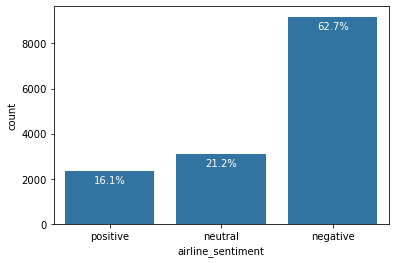

In [5]:
## Bar chart of Count & Proportion for target variable  
base_color = sb.color_palette()[0]
sb.countplot(data = df, x= 'airline_sentiment', color = base_color,
             order = ['positive', 'neutral', 'negative']);
#### add annotations
n_points = df.shape[0]
cat_counts = df['airline_sentiment'].value_counts()
locs, labels = plt.xticks()  # get the current tick locations and labels
#### loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    #### get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    #### print the annotation just below the top of the bar
    plt.text(loc, count-559, pct_string, ha='center', color='w')

# Missing Data

## Chart - Missing data

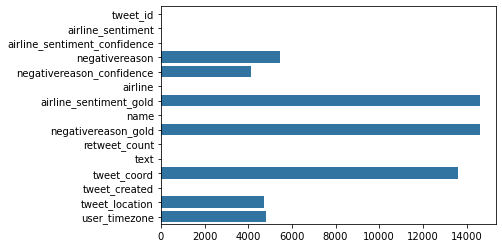

In [6]:
df.isna().sum()
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts, na_counts.index.values, color=base_color)

## Cols Removed

In [14]:
### Dropping cols
df.drop(columns=['tweet_coord', 'negativereason_gold', 'airline_sentiment_gold'], axis=1, inplace=True)

KeyError: "['tweet_coord' 'negativereason_gold' 'airline_sentiment_gold'] not found in axis"

# Comparison of customers for each Airline

In [ ]:
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

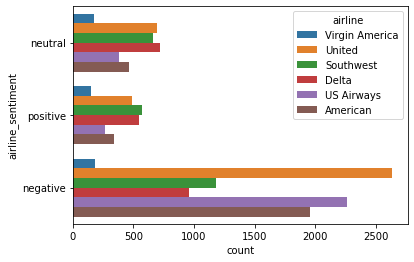

In [20]:
ax = sb.countplot(y="airline_sentiment", hue="airline", data=df)

# What are customers specifically happy or unhappy about

# Explore Hashtag and emojis

# Make chart for bar of what peoplea are saying. health bar. 

# Track sentiment over time

# Determine if particular segments feel more strongly about airline. Can we determine key promoters and detractors?

# Track how a change in service affects how customers feel.